In [1]:
# mount GDrive
from google.colab import drive
#drive.mount('/content/drive')
drive._mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r "drive/MyDrive/Artistic_Content_Creation/WASABI_gender_experiments/WASABI_gender_experiments_definitive/dataset_10/data_lyrics_group_decades" .
!cp -r "drive/MyDrive/Artistic_Content_Creation/WASABI_gender_experiments/WASABI_gender_experiments_definitive/dataset_10/data_lyrics_person_decades" .


In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
import glob
import re
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [4]:
# load dataset

data_folders = ['data_lyrics_person_decades/', 'data_lyrics_group_decades/']

song_lyrics = []

for data_folder in data_folders:
    type_ = data_folder.split('_')[-2]
    for file in glob.glob(data_folder+'*_[!.]*.json.gz'): # skip songs with no dates

        data_chunk = pd.read_json(file, orient='records', lines=True, chunksize=5000 )
        for chunk in data_chunk:        

            chunk = chunk[['song_id', 'song_title', 'language_detect', 'lyrics', 'n_words', 'n_lines', 'artist_id', 'artist_name',
                            'song_pubdate_combined', 'song_year_combined', 'song_decade_combined', 'other_artist_info']]
            song_lyrics.append(chunk)

song_lyrics = pd.concat(song_lyrics)
print('Total number of song lyrics: ', song_lyrics.shape[0])
song_lyrics.head()

Total number of song lyrics:  460339


,song_id,song_title,language_detect,lyrics,n_words,n_lines,artist_id,artist_name,song_pubdate_combined,song_year_combined,song_decade_combined,other_artist_info
0,5714dec325ac0d8aee380b13,Tears All Over Town,english,Ride the subway home\nPretend that you're not ...,192,33,56d7e9416b60c09814f93eb7,A Girl Called Eddy,2004-08-10,2004,2000,"{'n_albums': 2, 'n_songs': 16, 'languages': {'..."
1,5714dec325ac0d8aee380b14,Kathleen,english,If I don't laugh i'll cry\nAt all the years go...,201,39,56d7e9416b60c09814f93eb7,A Girl Called Eddy,2004-08-10,2004,2000,"{'n_albums': 2, 'n_songs': 16, 'languages': {'..."
2,5714dec325ac0d8aee380b15,Girls Can Really Tear You Up Inside,english,There's a girl whose stuck inside a picture fr...,233,38,56d7e9416b60c09814f93eb7,A Girl Called Eddy,2004-08-10,2004,2000,"{'n_albums': 2, 'n_songs': 16, 'languages': {'..."
3,5714dec325ac0d8aee380b16,The Long Goodbye,english,You stormed my winter palace\nYou rid my heart...,202,36,56d7e9416b60c09814f93eb7,A Girl Called Eddy,2004-08-10,2004,2000,"{'n_albums': 2, 'n_songs': 16, 'languages': {'..."
4,5714dec325ac0d8aee380b17,Somebody Hurt You,english,Boy\nSomebody hurt you\nBoy\nI wish I knew who...,210,42,56d7e9416b60c09814f93eb7,A Girl Called Eddy,2004-08-10,2004,2000,"{'n_albums': 2, 'n_songs': 16, 'languages': {'..."


In [5]:
# get artist type
song_lyrics.loc[:, 'artist_type'] = song_lyrics.other_artist_info.apply(lambda a_info: a_info['type'])
song_lyrics.loc[:, 'artist_type'] = song_lyrics.other_artist_info.apply(lambda a_info: a_info['type'])

In [12]:
print("Number of unique person artists: ", song_lyrics[song_lyrics.artist_type=='Person'].artist_id.unique().shape[0])
print("Number of group artists: ", song_lyrics[song_lyrics.artist_type=='Group'].artist_id.unique().shape[0])

Number of unique person artists:  7134
Number of group artists:  4296


In [6]:
print('Number of lyrics of Person artists: ', song_lyrics[song_lyrics.artist_type=='Person'].shape[0])
print('Number of lyrics of Group artists: ', song_lyrics[song_lyrics.artist_type=='Group'].shape[0])

Number of lyrics of Person artists:  297402
Number of lyrics of Group artists:  162937


In [7]:
# consider only persons. How many from male and females
print('Number of lyrics of male Person artists: ', song_lyrics[(song_lyrics.artist_type=='Person')].other_artist_info.apply(lambda a_info: 
                                                                                                                            a_info['gender']=='Male').sum())
print('Number of lyrics of female Person artists: ', song_lyrics[(song_lyrics.artist_type=='Person')].other_artist_info.apply(lambda a_info: 
                                                                                                                            a_info['gender']=='Female').sum())


Number of lyrics of male Person artists:  209239
Number of lyrics of female Person artists:  88163


In [8]:
# consider only groups. How many same gender members
print('Number of lyrics of Group artists with same gender members: ', song_lyrics[(song_lyrics.artist_type=='Group')].other_artist_info.apply(lambda a_info: 
                                                                                    a_info['n_male']==a_info['n_members'] or a_info['n_female']==a_info['n_members']).sum())

# consider only groups. How many same gender members
print('Number of lyrics of Group artists with different gender members: ', song_lyrics[(song_lyrics.artist_type=='Group')].other_artist_info.apply(lambda a_info: 
                                                                                    a_info['n_male']!=a_info['n_members'] and a_info['n_female']!=a_info['n_members']).sum())
print()

# n umber of lyrics of only male members
print('Number of lyrics of Group artists with only male members: ', song_lyrics[(song_lyrics.artist_type=='Group')].other_artist_info.apply(lambda a_info: 
                                                                                    a_info['n_male']==a_info['n_members']).sum())
print('Number of lyrics of Group artists with only female members: ', song_lyrics[(song_lyrics.artist_type=='Group')].other_artist_info.apply(lambda a_info: 
                                                                                    a_info['n_female']==a_info['n_members']).sum())


Number of lyrics of Group artists with same gender members:  133334
Number of lyrics of Group artists with different gender members:  29603

Number of lyrics of Group artists with only male members:  125842
Number of lyrics of Group artists with only female members:  7492


### Plot number of songs across year

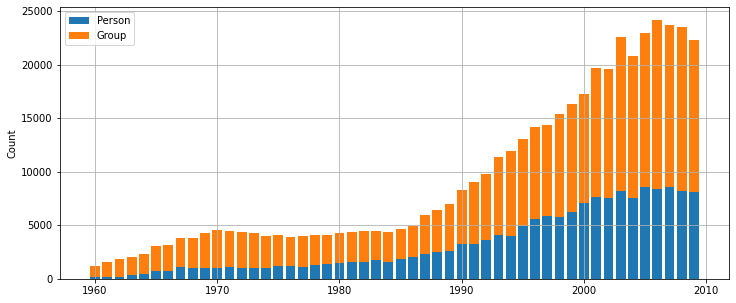

In [9]:
plt.figure(figsize=(12,5))

n_song_lyrics_year = song_lyrics.groupby("song_year_combined").apply(lambda rows: rows.artist_type.value_counts()).sort_index().fillna(0)

plt.bar(n_song_lyrics_year.index, n_song_lyrics_year.Group, label='Person')
plt.bar(n_song_lyrics_year.index, n_song_lyrics_year.Person, bottom=n_song_lyrics_year.Group, label='Group')

plt.ylabel("Count")
plt.grid()
plt.legend();

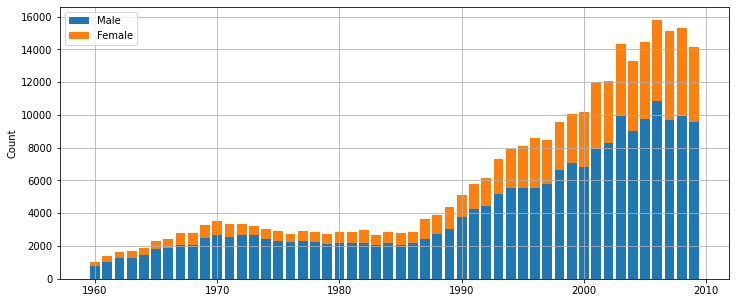

In [10]:
plt.figure(figsize=(12,5))

n_song_lyrics_person_year = song_lyrics[song_lyrics.artist_type=='Person'].groupby("song_year_combined").apply(lambda rows: 
                                                            rows.other_artist_info.apply(lambda a_info: a_info['gender']).value_counts().reindex(['Male', 'Female'], fill_value=0)).sort_index().fillna(0)

plt.bar(n_song_lyrics_person_year.index, n_song_lyrics_person_year.Male, label='Male')
plt.bar(n_song_lyrics_person_year.index, n_song_lyrics_person_year.Female, bottom=n_song_lyrics_person_year.Male, label='Female')

plt.ylabel("Count")
plt.grid()
plt.legend();

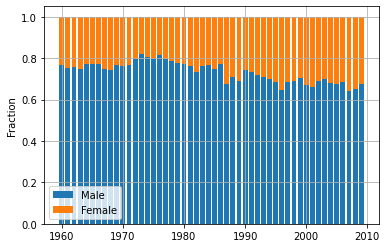

In [11]:
plt.bar(n_song_lyrics_person_year.index, n_song_lyrics_person_year.Male / n_song_lyrics_person_year.sum(axis=1), label='Male')
plt.bar(n_song_lyrics_person_year.index, n_song_lyrics_person_year.Female / n_song_lyrics_person_year.sum(axis=1), 
        bottom=n_song_lyrics_person_year.Male / n_song_lyrics_person_year.sum(axis=1), label='Female')

plt.ylabel("Fraction")
plt.grid()
plt.legend(loc='lower left');